<a href="https://colab.research.google.com/github/Nagendrakoteru/dsml_sept/blob/main/Wallmart_business_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv" -O 'Wallmart.csv'

--2024-05-13 12:46:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.238.102.180, 18.238.102.53, 18.238.102.107, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.238.102.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘Wallmart.csv’

Wallmart.csv        100%[===================>]  21.96M  --.-KB/s    in 0.1s    

2024-05-13 12:46:23 (165 MB/s) - ‘Wallmart.csv’ saved [23027994/23027994]



In [3]:
data=pd.read_csv("Wallmart.csv")
data.head()
#Insight:

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
data['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [5]:
data.dtypes



User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
#b. You can find the number of rows and columns given in the dataset
#Hint: You can find the shape of the dataset.
#Insight: we have 10 columns or fields and 550068 rows of data

data.shape

(550068, 10)

In [7]:
#c.Check for the missing values and find the number of missing values in each column
#Insight: We don't have any balnk or Null values in a  dataframe
data.isna().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

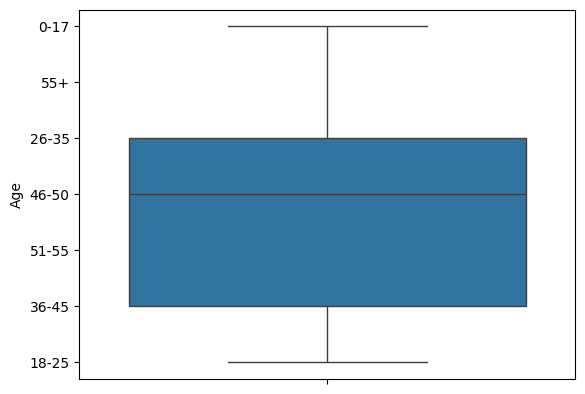

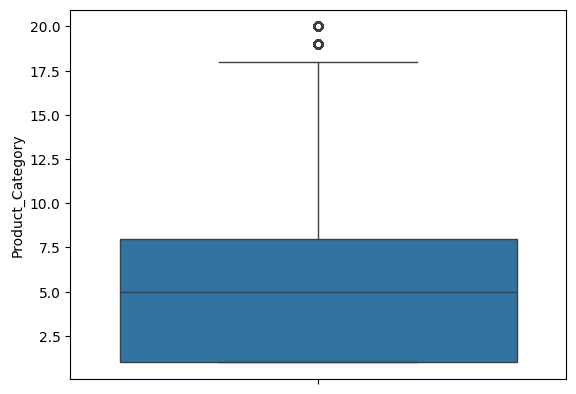

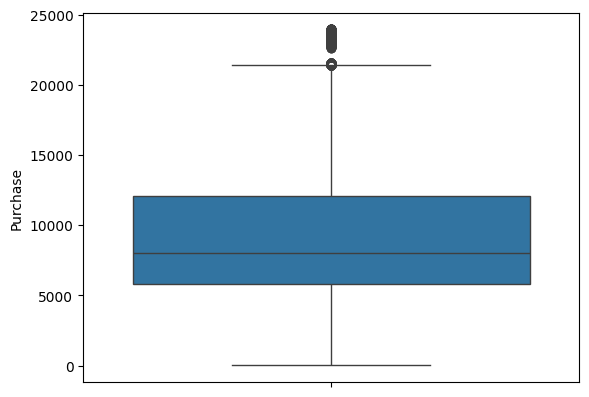

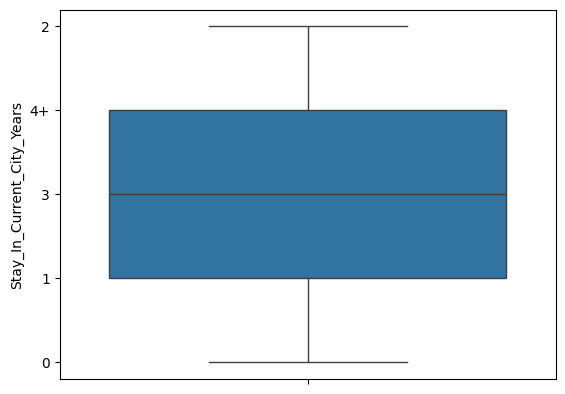

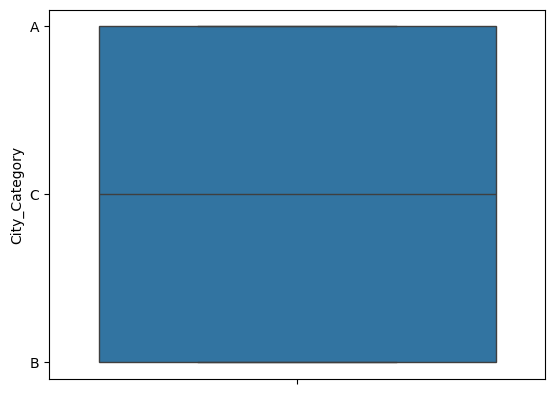

In [8]:
#2. Detect Null values and outliers
#a. Find the outliers for every continuous variable in the dataset


sns.boxplot(data=data,y='Age')
plt.show()
sns.boxplot(data=data,y='Product_Category')
plt.show()
sns.boxplot(data=data,y='Purchase')
plt.show()
sns.boxplot(data=data,y='Stay_In_Current_City_Years')
plt.show()

sns.boxplot(data=data,y='City_Category')
plt.show()

#x=data[['Product_Category','Purchase','City_Category']]

#plt.boxplot(data['Age'])

In [9]:
#b. Remove/clip the data between the 5 percentile and 95 percentile
percentile=data[['Occupation','Marital_Status','Product_Category','Purchase']].quantile([0.05,0.95])
percentile


,Occupation,Marital_Status,Product_Category,Purchase
0.05,0.0,0.0,1.0,1984.0
0.95,20.0,1.0,13.0,19336.0


In [10]:
data[['Occupation','Marital_Status','Product_Category','Purchase']].apply(lambda x: np.clip(x, percentile.loc[0.05, x.name], percentile.loc[0.95, x.name]))

,Occupation,Marital_Status,Product_Category,Purchase
0,10,0,3,8370
1,10,0,1,15200
2,10,0,12,1984
3,10,0,12,1984
4,16,0,8,7969
...,...,...,...,...
550063,13,1,13,1984
550064,1,0,13,1984
550065,15,1,13,1984
550066,1,0,13,1984


<Axes: xlabel='Age', ylabel='Count'>

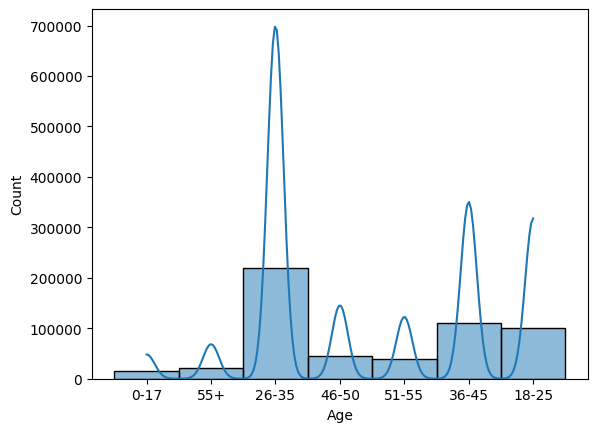

In [11]:
#3. Data Exploration
#. What products are different age groups buying?
#Hint: You can use histplot to find the relationship between products and age groups

sns.histplot(data=data[['Product_Category','Age']],kde='Product_Category',x='Age')#,x='Product_Category',y='Age')

<Axes: xlabel='Age', ylabel='Purchase'>

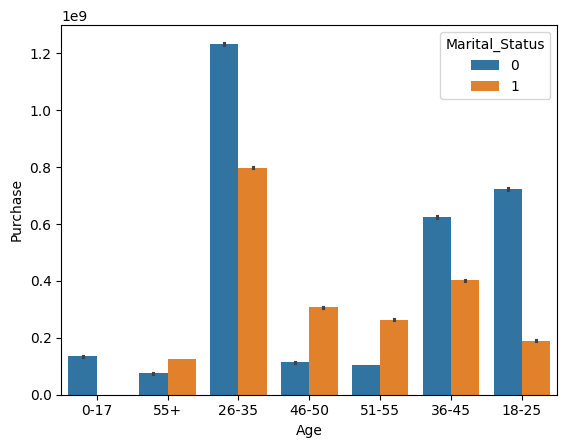

In [12]:
#b. Is there a relationship between age, marital status, and the amount spent?
#Hint: You can do multivariate analysis to find the relationship between age,marital status, and the amount spent
#Insight: Total amount is increased for the people with age 26-35 and decreased from age above 36 and
  #Sum of sales increased in married persons from 46 years when compared with Single/bachelor persons

sns.barplot(data=data,y='Purchase',hue='Marital_Status',x='Age',estimator='sum')

<Axes: xlabel='Age', ylabel='Purchase'>

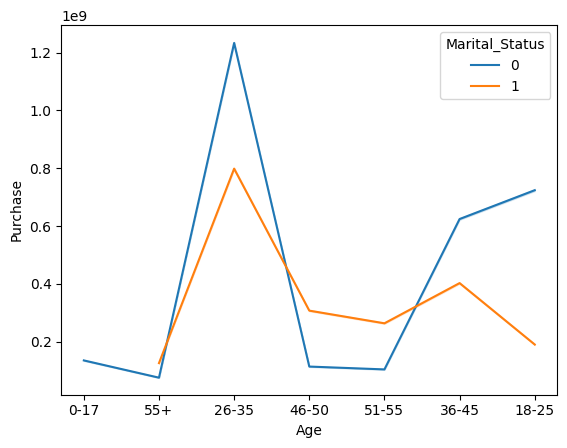

In [13]:
sns.lineplot(data=data,y='Purchase',hue='Marital_Status',x='Age',estimator='sum')

In [14]:
list(data['Age'].unique())

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

Text(0.5, 1.0, 'Prefered product categeries over Female')

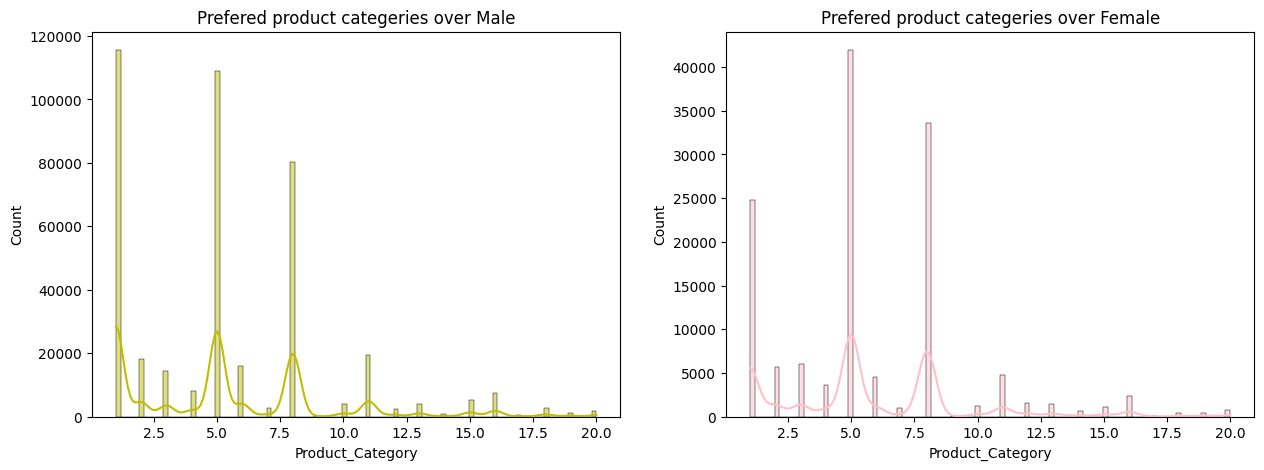

In [15]:
#C.Are there preferred product categories for different genders?
#Hint: You can apply different hist plots for different genders
#Insight: In Male product category 1.0 with Male is most purchased product and 5.0 in Female is most prefered category
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data[data['Gender']=='M'],x='Product_Category',color='y',kde=True)
plt.title("Prefered product categeries over Male")

plt.subplot(1,2,2)
sns.histplot(data=data[data['Gender']=='F'],x='Product_Category',color='pink',kde=True)
plt.title("Prefered product categeries over Female")

In [16]:
#4. How does gender affect the amount spent?
#Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
#intervals for the average amount spent per gender. First, compute the confidence
#interval for whatever data is available, and then repeat the same with smaller sample
#sizes - 300, 3000, and 30000.

mean=np.mean(data['Purchase'])
bootstrap_means = [np.mean(np.random.choice(data['Purchase'], size=len(data['Purchase']), replace=True)) for _ in range(1000)]
#print(bootstrap_means,mean)
lower_bound=np.percentile(bootstrap_means,2.5)
upper_bound=np.percentile(bootstrap_means,97.5)



In [17]:
male_data=data[data['Gender']=='M']['Purchase']
female_data=data[data['Gender']=='F']['Purchase']
from scipy import stats

In [18]:
def clt_confidence_interval(data,confidence=0.95):
  sample_mean=np.mean(data)
  sample_std=np.std(data,ddof=1)
  z_critical=stats.norm.ppf((1+confidence)/2)
  marginal_error=z_critical*(sample_std/np.sqrt(len(data)))
  confidence_lower,confidence_upper=sample_mean-marginal_error,sample_mean+marginal_error
  return confidence_lower,confidence_upper


In [39]:
def bootstrap_confidence_interval(data, sample_size, iterations=1000, confidence=0.95):
    means = []
    for _ in range(iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    ci_lower, ci_upper = np.percentile(means, [(1-confidence)/2 * 100, (1+confidence)/2 * 100])
    return ci_lower, ci_upper

In [58]:
male_confidence_bootstrap,female_confidence_bootstrap=[],[]

samplesize=[len(male_data),300, 3000, 30000]
for size in samplesize:
  male_confidence_bootstrap.append(bootstrap_confidence_interval(data=male_data,sample_size=size))#clt_confidence_interval(male_sample))
  female_confidence_bootstrap.append(bootstrap_confidence_interval(data=female_data,sample_size=size))




In [52]:
print(male_confidence_bootstrap)
print(female_confidence_bootstrap)

[(9423.785618778042, 9451.262820142236), (8844.230333333335, 10055.625750000001), (9269.143083333334, 9626.206008333333), (9386.854004166667, 9493.074610833333)]
[(8721.331074430796, 8747.595174596594), (8207.23725, 9271.689999999999), (8565.844591666666, 8908.928066666667), (8683.847508333334, 8789.471468333333)]


In [49]:
"""male_confidence,female_confidence=[],[]
male_confidence.append(confidence_Interval_male)
female_confidence.append(confidence_Interval_female)
#male_confidence_lower,male_confidence_upper,female_confidence_lower,female_confidence_upper=[],[],[],[]

for size in [300, 3000, 30000]:
  male_sample = np.random.choice(male_data, size=size, replace=True)
  female_sample = np.random.choice(male_data, size=size, replace=True)
  male_confidence.append(clt_confidence_interval(male_sample))
  female_confidence.append(clt_confidence_interval(female_sample))

male_confidence_lower=[sample[0] for sample in male_confidence]
male_confidence_upper=[sample[1] for sample in male_confidence]
female_confidence_lower=[sample[0] for sample in female_confidence]
female_confidence_upper=[sample[1] for sample in female_confidence]
sampleSize=[len(data),300, 3000, 30000]

print(male_confidence)
print(female_confidence)
"""
male_confidence_lower=[sample[0] for sample in male_confidence_bootstrap]
male_confidence_upper=[sample[1] for sample in male_confidence_bootstrap]
female_confidence_lower=[sample[0] for sample in female_confidence_bootstrap]
female_confidence_upper=[sample[1] for sample in female_confidence_bootstrap]

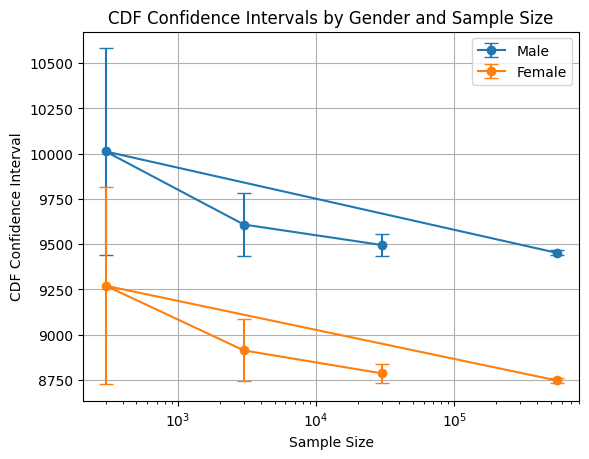

In [51]:
plt.errorbar(sampleSize, male_confidence_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(male_confidence_upper,male_confidence_lower)], label='Male', fmt='o-', capsize=5)


plt.errorbar(sampleSize, female_confidence_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(female_confidence_upper, female_confidence_lower)], label='Female', fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('CDF Confidence Interval')
plt.title('CDF Confidence Intervals by Gender and Sample Size')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#a. From the above calculated CLT answer the following questions.
#i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
  #By Checking entire dataset observed that Confidence interval for male is lesser than female,
  #this looks like there is a lesser variability in amount spent in males when compared with Females
#ii. How is the width of the confidence interval affected by the sample size?
  #Width of the Confidence interval decreases when sample size is increased till actual data or more data, this is leading to
  #more precise estimate of the population parameter
#iii. Do the confidence intervals for different sample sizes overlap?
  #Yes, confidence intervals for different sample sizes overlap for both genders.
  #There is no significant difference in the distribution of the amount spent between genders within each sample size.
  #Overlapping confidence intervals suggest that any observed differences in the CDFs between genders may not be statistically significant.

#iv. How does the sample size affect the shape of the distributions of the means?
  #As the sample size increases, the shape of the distributions of the means becomes more symmetric and bell-shaped.
  #This is accoridng with the Central Limit Theorem, which states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases,
  # regardless of the shape of the population distribution.
  # Therefore, with larger sample sizes, the distribution of the means becomes more representative of the population distribution, resulting in a smoother and more symmetric shape.

In [ ]:
#5. How does Marital_Status affect the amount spent?
#Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
#intervals for the average amount spent per Marital_Status. First, compute the
#confidence interval for whatever data is available, and then repeat the same with
#smaller sample sizes - 300, 3000, and 30000.
#a. From the above calculated CLT answer the following questions.


In [81]:
MaritialStatus0=data[data['Marital_Status']==0]['Purchase']
MaritialStatus1=data[data['Marital_Status']==1]['Purchase']

In [82]:
sizes=[len(MaritialStatus0),300, 3000, 30000]
married_confidence_bootstrap,unmarried_confidence_bootstrap=[],[]#[bootstrap_confidence_interval(data=MaritialStatus0,sample_size=len(MaritialStatus0))],[bootstrap_confidence_interval(data=MaritialStatus1,sample_size=len(MaritialStatus1))]
for size in sizes:
  married_confidence_bootstrap.append(bootstrap_confidence_interval(data=MaritialStatus0,sample_size=size))
  unmarried_confidence_bootstrap.append(bootstrap_confidence_interval(data=MaritialStatus1,sample_size=size))

print(married_confidence_bootstrap)
print(unmarried_confidence_bootstrap)


[(9249.572598550802, 9282.532212508198), (8691.123833333333, 9823.053833333333), (9085.633633333333, 9443.630416666665), (9206.159513333334, 9318.51491)]
[(9244.264841514976, 9279.051986028435), (8728.917083333334, 9872.397083333333), (9094.133066666667, 9426.237149999999), (9203.115114166667, 9318.27103)]


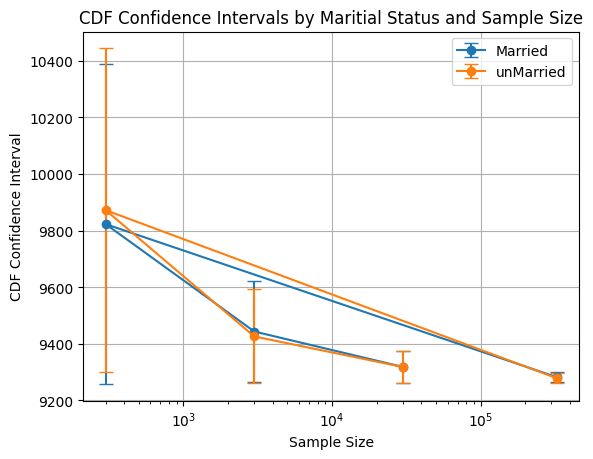

In [84]:
married_confidence_bootstrap_upper=[x[1] for x in married_confidence_bootstrap]
married_confidence_bootstrap_lower=[x[0] for x in married_confidence_bootstrap]
unmarried_confidence_bootstrap_upper=[x[1] for x in unmarried_confidence_bootstrap]
unmarried_confidence_bootstrap_lower=[x[0] for x in unmarried_confidence_bootstrap]
# print(len(married_confidence_bootstrap),len(unmarried_confidence_bootstrap),len(sizes))

plt.errorbar(sizes,married_confidence_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(married_confidence_bootstrap_upper,married_confidence_bootstrap_lower)], label='Married', fmt='o-', capsize=5)


plt.errorbar(sizes, unmarried_confidence_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(unmarried_confidence_bootstrap_upper, unmarried_confidence_bootstrap_lower)], label='unMarried', fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('CDF Confidence Interval')
plt.title('CDF Confidence Intervals by Maritial Status and Sample Size')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#i. Is the confidence interval computed using the entire dataset wider for
#one of the genders? Why is this the case?
# suggests higher variability in the amount spent among unmarried individuals.

#ii. How is the width of the confidence interval affected by the sample size?
#for both married and unmarried individuals, as the sample size increases, the width of the confidence interval is expected to decrease

#iii. Do the confidence intervals for different sample sizes overlap?
# There is no significant difference in the distribution of the amount spent
# between married and unmarried individuals within each sample size.

#iv. How does the sample size affect the shape of the distributions of the means?
#With larger sample sizes, the distribution of the means becomes more representative of the population distribution, resulting in a smoother and more symmetric shape.


In [ ]:
#6. How does Age affect the amount spent?
#Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
#intervals for the average amount spent per Marital_Status. First, compute the
#confidence interval for whatever data is available, and then repeat the same with
#smaller sample sizes - 300, 3000, and 30000.
#a. From the above calculated CLT answer the following questions.

#i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?


#ii. How is the width of the confidence interval affected by the sample size?

#iii. Do the confidence intervals for different sample sizes overlap?

#iv. How does the sample size affect the shape of the distributions of the means?



In [85]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [93]:
data0_17=data[data['Age']=='0-17']['Purchase']
data18_25=data[data['Age']=='18-25']['Purchase']
data26_35=data[data['Age']=='26-35']['Purchase']
data36_45=data[data['Age']=='36-45']['Purchase']
data46_50=data[data['Age']=='46-50']['Purchase']
data51_55=data[data['Age']=='51-55']['Purchase']
data55=data[data['Age']=='55+']['Purchase']

In [98]:
data0_17_bootstrap,data18_25_bootstrap,data26_35_bootstrap,data36_45_bootstrap,data46_50_bootstrap,data51_55_bootstrap,data55_bootstrap=[],[],[],[],[],[],[]
sample_sizes=[300,3000,30000]

for size in sample_sizes:
  data0_17_bootstrap.append(bootstrap_confidence_interval(data=data0_17,sample_size=size))
  data18_25_bootstrap.append(bootstrap_confidence_interval(data=data18_25,sample_size=size))
  data26_35_bootstrap.append(bootstrap_confidence_interval(data=data26_35,sample_size=size))
  data36_45_bootstrap.append(bootstrap_confidence_interval(data=data36_45,sample_size=size))
  data46_50_bootstrap.append(bootstrap_confidence_interval(data=data46_50,sample_size=size))
  data51_55_bootstrap.append(bootstrap_confidence_interval(data=data51_55,sample_size=size))
  data55_bootstrap.append(bootstrap_confidence_interval(data=data55,sample_size=size))




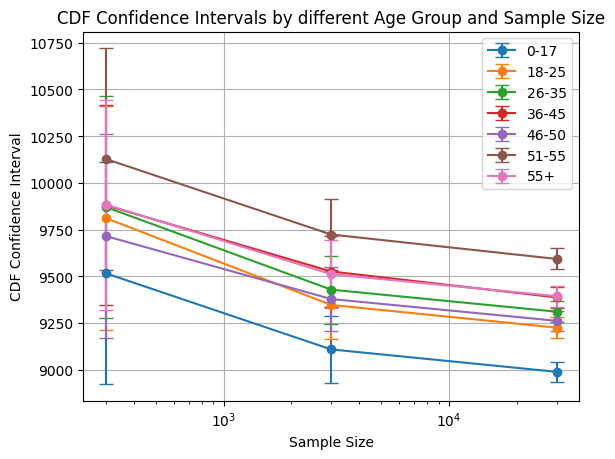

In [96]:
data0_17_bootstrap_upper=[x[1] for x in data0_17_bootstrap]
data0_17_bootstrap_lower=[x[0] for x in data0_17_bootstrap]

data18_25_bootstrap_upper=[x[1] for x in data18_25_bootstrap]
data18_25_bootstrap_lower=[x[0] for x in data18_25_bootstrap]

data26_35_bootstrap_upper=[x[1] for x in data26_35_bootstrap]
data26_35_bootstrap_lower=[x[0] for x in data26_35_bootstrap]

data36_45_bootstrap_upper=[x[1] for x in data36_45_bootstrap]
data36_45_bootstrap_lower=[x[0] for x in data36_45_bootstrap]

data46_50_bootstrap_upper=[x[1] for x in data46_50_bootstrap]
data46_50_bootstrap_lower=[x[0] for x in data46_50_bootstrap]

data51_55_bootstrap_upper=[x[1] for x in data51_55_bootstrap]
data51_55_bootstrap_lower=[x[0] for x in data51_55_bootstrap]

data55_bootstrap_upper=[x[1] for x in data55_bootstrap]
data55_bootstrap_lower=[x[0] for x in data55_bootstrap]




plt.errorbar(sample_sizes,data0_17_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(data0_17_bootstrap_upper,data0_17_bootstrap_lower)], label='0-17', fmt='o-', capsize=5)
plt.errorbar(sample_sizes,data18_25_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(data18_25_bootstrap_upper,data18_25_bootstrap_lower)], label='18-25', fmt='o-', capsize=5)
plt.errorbar(sample_sizes, data26_35_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(data26_35_bootstrap_upper, data26_35_bootstrap_lower)], label='26-35', fmt='o-', capsize=5)

plt.errorbar(sample_sizes,data36_45_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(data36_45_bootstrap_upper,data36_45_bootstrap_lower)], label='36-45', fmt='o-', capsize=5)
plt.errorbar(sample_sizes, data46_50_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(data46_50_bootstrap_upper, data46_50_bootstrap_lower)], label='46-50', fmt='o-', capsize=5)
plt.errorbar(sample_sizes,data51_55_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(data51_55_bootstrap_upper,data51_55_bootstrap_lower)], label='51-55', fmt='o-', capsize=5)
plt.errorbar(sample_sizes, data55_bootstrap_upper, yerr=[(upper - lower) / 2 for upper, lower in zip(data55_bootstrap_upper, data55_bootstrap_lower)], label='55+', fmt='o-', capsize=5)


plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('CDF Confidence Interval')
plt.title('CDF Confidence Intervals by different Age Group and Sample Size')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
# Function to compute confidence interval using CLT
def clt_confidence_interval(data, confidence=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Use sample standard deviation
    z_critical = stats.norm.ppf((1 + confidence) / 2)  # Two-tailed z-value for given confidence level
    margin_of_error = z_critical * (sample_std / np.sqrt(len(data)))
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    return ci_lower, ci_upper

#7. Create a report

##a. Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

###Hint: Check whether the average spending of males and females overlap or not using the CLT that you calculated

### ** Insight: Analyze Product categroy which are using by Female and conduct surveys to increase sales by customization by adding geneder specific Products **


In [103]:
maleagebootstrap=clt_confidence_interval(data=male_data)
femaleagebootstrap=clt_confidence_interval(data=female_data)
if maleagebootstrap[1]>=femaleagebootstrap[0] and maleagebootstrap[0]<=femaleagebootstrap[1]:
  print("The confidence intervals for the average amount spent by males and females overlap.")
else:
  print("The confidence intervals for the average amount spent by males and females doesn't overlap")

The confidence intervals for the average amount spent by males and females doesn't overlap


##b. Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?
###Hint: Check whether the average spending of married and unmarried overlap or not using the CLT that you calculated.

###**Insight: Analyze Product categroy which are using by Marries and Unmarried and conduct surveys to find out pain points and Increase sales  **

In [104]:
marriedbootstrap=clt_confidence_interval(data=MaritialStatus0)
unmarriedbootstrap=clt_confidence_interval(data=MaritialStatus1)
if marriedbootstrap[1]>=unmarriedbootstrap[0] and marriedbootstrap[0]<=unmarriedbootstrap[1]:
  print("The confidence intervals for the average amount spent by males and females overlap.")
else:
  print("The confidence intervals for the average amount spent by males and females doesn't overlap")

The confidence intervals for the average amount spent by males and females overlap.


##C. Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?
###Hint: Check whether the average spending of different age groups overlaps or not using the CLT that you calculated.

###**Insight: Product Customization might required here to attact more customers **

In [105]:
data0_17=data[data['Age']=='0-17']['Purchase']
data18_25=data[data['Age']=='18-25']['Purchase']
data26_35=data[data['Age']=='26-35']['Purchase']
data36_45=data[data['Age']=='36-45']['Purchase']
data46_50=data[data['Age']=='46-50']['Purchase']
data51_55=data[data['Age']=='51-55']['Purchase']
data55=data[data['Age']=='55+']['Purchase']

clt17=clt_confidence_interval(data0_17)
clt18_25=clt_confidence_interval(data18_25)
clt26_35=clt_confidence_interval(data26_35)
clt36_45=clt_confidence_interval(data36_45)
clt46_50=clt_confidence_interval(data46_50)
clt51_55=clt_confidence_interval(data51_55)
clt55=clt_confidence_interval(data55)

cltset=[clt17,clt18_25,clt26_35,clt36_45,clt46_50,clt51_55,clt55]

for i in range(len(cltset)):
    for j in range(i+1, len(cltset)):
        if cltset[i][1] >= cltset[j][0] and cltset[j][1] >= cltset[i][0]:
            print(f"Confidence intervals for age groups {i} and {j} overlap.")
        else:
            print(f"Confidence intervals for age groups {i} and {j} do not overlap.")

Confidence intervals for age groups 0 and 1 do not overlap.
Confidence intervals for age groups 0 and 2 do not overlap.
Confidence intervals for age groups 0 and 3 do not overlap.
Confidence intervals for age groups 0 and 4 do not overlap.
Confidence intervals for age groups 0 and 5 do not overlap.
Confidence intervals for age groups 0 and 6 do not overlap.
Confidence intervals for age groups 1 and 2 do not overlap.
Confidence intervals for age groups 1 and 3 do not overlap.
Confidence intervals for age groups 1 and 4 overlap.
Confidence intervals for age groups 1 and 5 do not overlap.
Confidence intervals for age groups 1 and 6 do not overlap.
Confidence intervals for age groups 2 and 3 do not overlap.
Confidence intervals for age groups 2 and 4 overlap.
Confidence intervals for age groups 2 and 5 do not overlap.
Confidence intervals for age groups 2 and 6 overlap.
Confidence intervals for age groups 3 and 4 do not overlap.
Confidence intervals for age groups 3 and 5 do not overlap.
C

<Axes: xlabel='Age', ylabel='Purchase'>

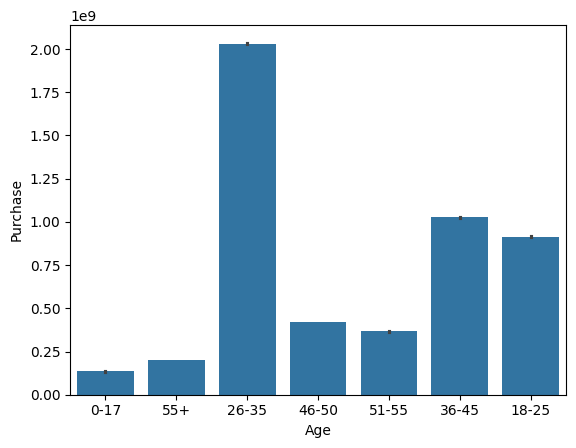

In [109]:
sns.barplot(data=data,x='Age',y='Purchase',estimator='sum')